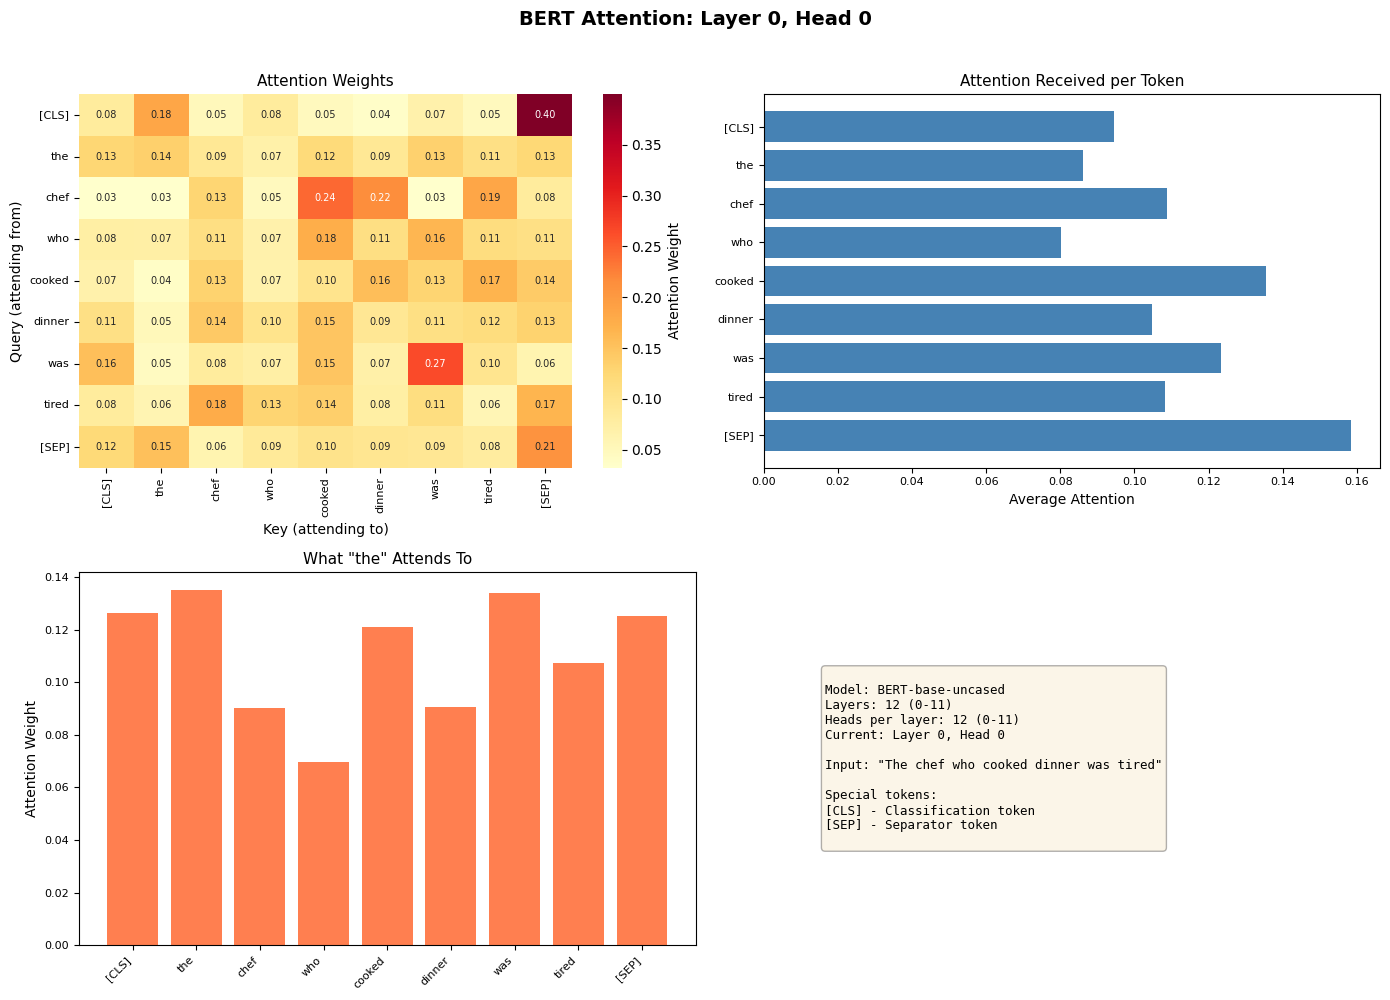

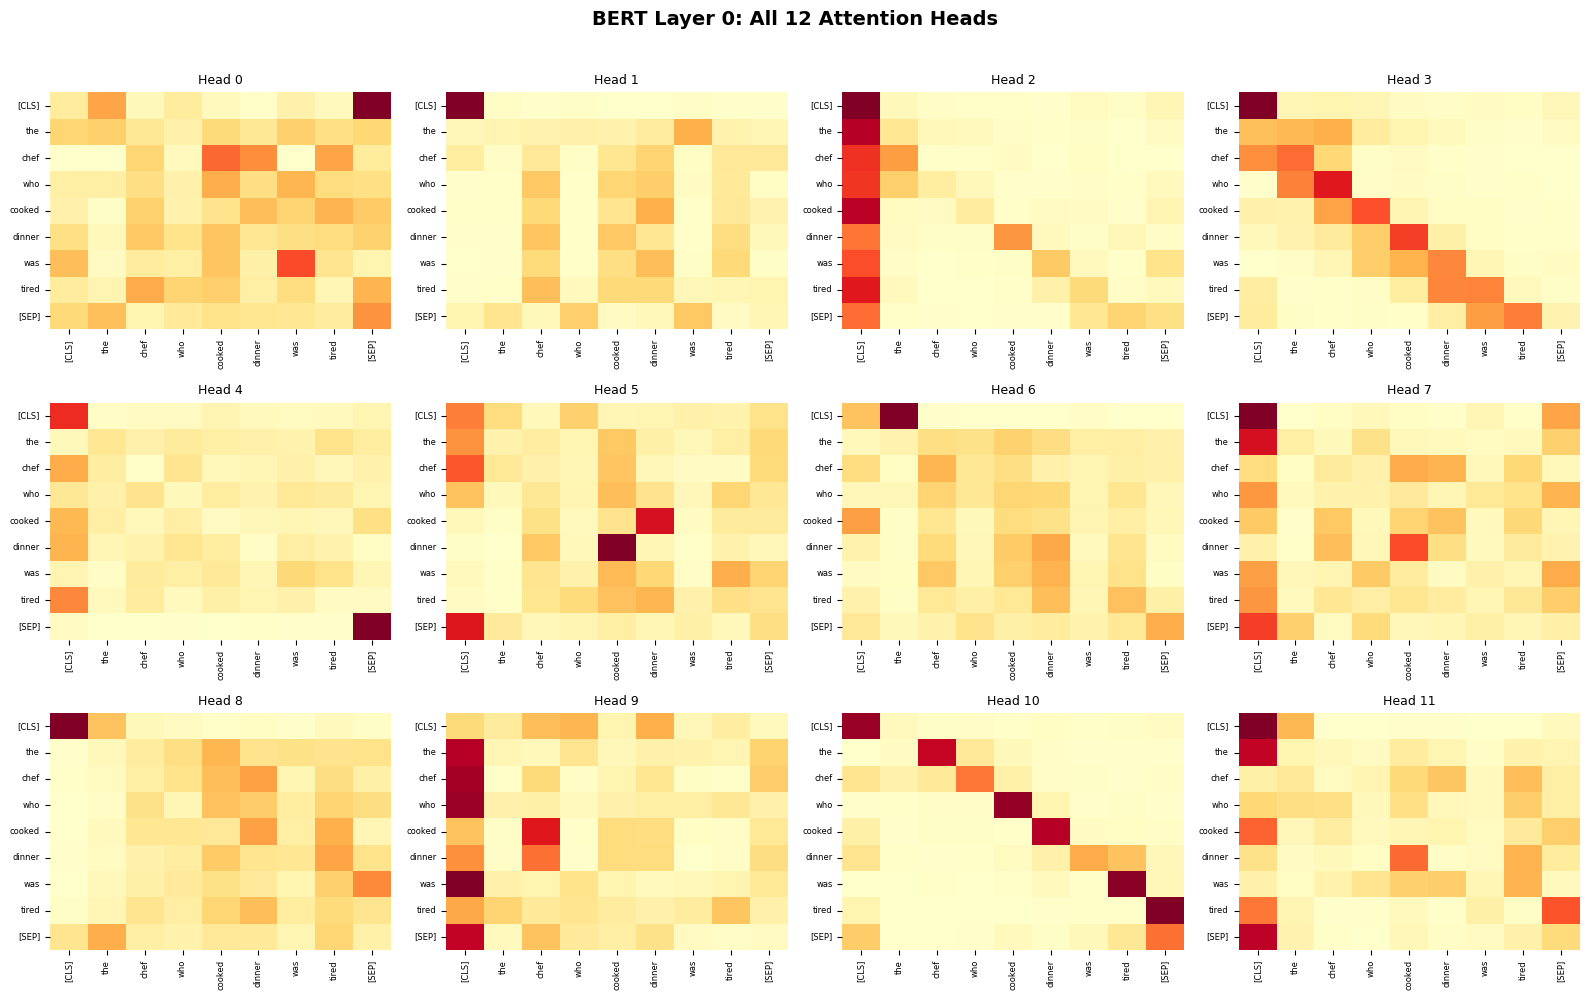

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
import torch

def get_bert_attention(text, layer=0, head=0):
    """Extract attention weights from trained BERT model."""
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    
    attention = outputs.attentions[layer][0, head].detach().numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    
    return tokens, attention, outputs.attentions

def visualize_attention(text, layer=0, head=0):
    """Visualize attention from BERT model."""
    tokens, attention, all_attentions = get_bert_attention(text, layer, head)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'BERT Attention: Layer {layer}, Head {head}', 
                 fontsize=14, fontweight='bold', y=0.995)
    
    # Main attention heatmap
    sns.heatmap(attention, annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=tokens, yticklabels=tokens,
                cbar_kws={'label': 'Attention Weight'}, ax=axes[0, 0],
                annot_kws={'size': 7})
    axes[0, 0].set_title('Attention Weights', fontsize=11)
    axes[0, 0].set_xlabel('Key (attending to)', fontsize=10)
    axes[0, 0].set_ylabel('Query (attending from)', fontsize=10)
    axes[0, 0].tick_params(labelsize=8)
    
    # Average attention received per token
    avg_attention = attention.mean(axis=0)
    axes[0, 1].barh(range(len(tokens)), avg_attention, color='steelblue')
    axes[0, 1].set_yticks(range(len(tokens)))
    axes[0, 1].set_yticklabels(tokens, fontsize=8)
    axes[0, 1].set_xlabel('Average Attention', fontsize=10)
    axes[0, 1].set_title('Attention Received per Token', fontsize=11)
    axes[0, 1].tick_params(axis='x', labelsize=8)
    axes[0, 1].invert_yaxis()
    
    # Attention from first content token
    first_real_token = 1
    axes[1, 0].bar(range(len(tokens)), attention[first_real_token], color='coral')
    axes[1, 0].set_xticks(range(len(tokens)))
    axes[1, 0].set_xticklabels(tokens, rotation=45, ha='right', fontsize=8)
    axes[1, 0].set_ylabel('Attention Weight', fontsize=10)
    axes[1, 0].set_title(f'What "{tokens[first_real_token]}" Attends To', fontsize=11)
    axes[1, 0].tick_params(axis='y', labelsize=8)
    
    # Model info
    axes[1, 1].axis('off')
    info_text = f"""
Model: BERT-base-uncased
Layers: 12 (0-11)
Heads per layer: 12 (0-11)
Current: Layer {layer}, Head {head}

Input: "{text}"

Special tokens:
[CLS] - Classification token
[SEP] - Separator token
    """
    axes[1, 1].text(0.1, 0.5, info_text, fontsize=9, family='monospace',
                   verticalalignment='center', bbox=dict(boxstyle='round',
                   facecolor='wheat', alpha=0.3))
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

def visualize_all_heads(text, layer=0):
    """Visualize all 12 attention heads for a given layer."""
    tokens, _, all_attentions = get_bert_attention(text, layer, head=0)
    
    fig, axes = plt.subplots(3, 4, figsize=(16, 10))
    fig.suptitle(f'BERT Layer {layer}: All 12 Attention Heads', 
                 fontsize=14, fontweight='bold', y=0.995)
    
    for head in range(12):
        attention = all_attentions[layer][0, head].detach().numpy()
        ax = axes[head // 4, head % 4]
        sns.heatmap(attention, cmap='YlOrRd', cbar=False,
                    xticklabels=tokens, yticklabels=tokens, ax=ax)
        ax.set_title(f'Head {head}', fontsize=9)
        ax.tick_params(labelsize=6)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Example usage
text = "The chef who cooked dinner was tired"

# Single head view
visualize_attention(text, layer=0, head=0)

# All heads view
visualize_all_heads(text, layer=0)